In [42]:
#import libraries
#write your code.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [43]:
#load data

#write your code
data=pd.read_csv('data.txt',header=None)
column_names = ['Test1','Test2','target']


# Assign the column names to the dataframe
data.columns = column_names

data
X_train=data.iloc[:,0:2]
y_train=data.iloc[:,2]

In [44]:
#plot data to visualise
def plot_data(X,y,pos_label="y=1", neg_label="y=0"):
#positive_label and negative_label refers to classes of y as y can be 0 or 1
#While plotting graph the label parameter will be either positive_label or negative_label so plot both the labels for X
#write your code
    if isinstance(X, pd.DataFrame):
        
        X = X.values

    # Convert y to numpy array for easier indexing
    y = np.array(y).flatten()

    # Select the first and second columns of X
    X = X[:, :2]

    # Find indexes of positive and negative examples
    positive = y == 1
    negative = y == 0

    # Plot positive examples using the first and second columns
    plt.scatter(X[positive, 0], X[positive, 1], c='b', marker='o', label=pos_label)

    # Plot negative examples using the first and second columns
    plt.scatter(X[negative, 0], X[negative, 1], c='r', marker='x', label=neg_label)

    # Set labels
    plt.title('Data Visualization using First and Second Columns')
    plt.xlabel('Test 2')
    plt.ylabel('Test 1')
    plt.legend(loc="upper right")
    plt.show()
    

    

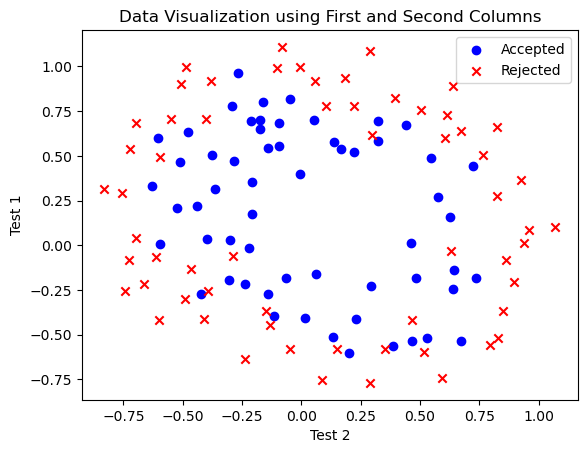

In [45]:
#test
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")


In [46]:
#feature mapping
def map_feature(X1,X2):
    #write your code
    degree=5
    m = len(X1)  # number of examples
    

    Out = np.ones(len(X1)).reshape(-1, 1)  # Initialize output matrix with ones

    for i in range(1, degree + 1):
        for j in range(i + 1):
            # Calculate polynomial feature and append to output matrix
            new_feature = (X1 ** (i - j)) * (X2 ** j)
            new_feature=np.array(new_feature)
            Out = np.hstack((Out, new_feature.reshape(-1, 1)))  # Convert new_feature to numpy array before reshape

    return Out


In [47]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train.iloc[:, 0], X_train.iloc[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 21)


# Do not edit this code

In [48]:
# @title DO NOT EDIT THIS CODE
def sigmoid_test(target):
    assert np.isclose(target(3.0), 0.9525741268224334), "Failed for scalar input"
    assert np.allclose(target(np.array([2.5, 0])), [0.92414182, 0.5]), "Failed for 1D array"
    assert np.allclose(target(np.array([[2.5, -2.5], [0, 1]])),
                       [[0.92414182, 0.07585818], [0.5, 0.73105858]]), "Failed for 2D array"
    print('\033[92mTests passed!')

In [49]:
#sigmoid function
def sigmoid(z):
    #write your code
    return 1 / (1 + np.exp(-z))



In [50]:
sigmoid_test(sigmoid)

Tests passed!


# Do not edit this code

In [51]:
# @title DO NOT EDIT THIS CODE
def compute_cost_test(target):
    X = np.array([[0, 0, 0, 0]]).T
    y = np.array([0, 0, 0, 0])
    w = np.array([0])
    b = 1
    result = target(X, y, w, b)
    if math.isinf(result):
        raise ValueError("Did you get the sigmoid of z_wb?")

    np.random.seed(17)
    X = np.random.randn(5, 2)
    y = np.array([1, 0, 0, 1, 1])
    w = np.random.randn(2)
    b = 0
    result = target(X, y, w, b)
    assert np.isclose(result, 2.15510667), f"Wrong output. Expected: {2.15510667} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 1, 0, 0])
    w = np.random.randn(3)
    b = 0

    result = target(X, y, w, b)
    assert np.isclose(result, 0.80709376), f"Wrong output. Expected: {0.80709376} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 0,1, 0])
    w = np.random.randn(3)
    b = 3
    result = target(X, y, w, b)
    assert np.isclose(result, 0.4529660647), f"Wrong output. Expected: {0.4529660647} got: {result}. Did you inizialized z_wb = b?"

    print('\033[92mTests passed!')

In [52]:
#computing cost
def compute_cost(X,y,w,b,lambda_=1):
    #write your code
    m = len(y)  # number of training examples
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    
    # Compute cost using the logistic loss function
    cost = -(1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    
#     if lambda_ > 0:
#         reg_term = (lambda_ / (2 * m)) * np.sum(w**2)
#         cost += reg_term
    total_cost=cost
    return total_cost

In [53]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


# test
compute_cost_test(compute_cost)

Cost at test w,b: 11.777
Tests passed!


In [54]:
#compute regularised cost
def compute_cost_reg(X, y, w, b, lambda_ = 1):
#write your code
    m = len(y)
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    
    # Compute logistic loss
    logistic_loss = -(1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    
    # Compute regularization term
    reg_term = (lambda_ / (2 * m)) * np.sum(w**2)
    
    # Total cost including regularization
    total_cost = logistic_loss + reg_term
    
    return total_cost


# Do not edit this code

In [55]:
# @title DO NOT EDIT THIS CODE
def compute_cost_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(3)
    b = 0.4
    X = np.random.randn(6, 3)
    y = np.array([0, 1, 1, 0, 1, 1])
    lambda_ = 0.1
    expected_output = target(X, y, w, b, lambda_)

    assert np.isclose(expected_output, 0.5469746792761936), f"Wrong output. Expected: {0.5469746792761936} got:{expected_output}"

    w = np.random.randn(5)
    b = -0.6
    X = np.random.randn(8, 5)
    y = np.array([1, 0, 1, 0, 0, 1, 0, 1])
    lambda_ = 0.01
    output = target(X, y, w, b, lambda_)
    assert np.isclose(output, 1.2608591964119995), f"Wrong output. Expected: {1.2608591964119995} got:{output}"

    w = np.array([2, 2, 2, 2, 2])
    b = 0
    X = np.zeros((8, 5))
    y = np.array([0.5] * 8)
    lambda_ = 3
    output = target(X, y, w, b, lambda_)
    expected = -np.log(0.5) + 3. / (2. * 8.) * 20.
    assert np.isclose(output, expected), f"Wrong output. Expected: {expected} got:{output}"

    print('\033[92mAll tests passed!')

In [56]:
X_mapped = map_feature(X_train.iloc[:, 0], X_train.iloc[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularised cost :", cost)

#test
compute_cost_reg_test(compute_cost_reg)

Regularised cost : 0.6733187663905544
All tests passed!


# Do not edit this code

In [57]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_test(target):
    np.random.seed(1)
    X = np.random.randn(7, 3)
    y = np.array([1, 0, 1, 0, 1, 1, 0])
    test_w = np.array([1, 0.5, -0.35])
    test_b = 1.7
    dj_db, dj_dw  = target(X, y, test_w, test_b)

    assert np.isclose(dj_db, 0.28936094), f"Wrong value for dj_db. Expected: {0.28936094} got: {dj_db}"
    assert dj_dw.shape == test_w.shape, f"Wrong shape for dj_dw. Expected: {test_w.shape} got: {dj_dw.shape}"
    assert np.allclose(dj_dw, [-0.11999166, 0.41498775, -0.71968405]), f"Wrong values for dj_dw. Got: {dj_dw}"

    print('\033[92mTests passed!')

In [58]:
#compute gradient
def compute_gradient(X, y, w, b, lambda_=None):
#write your code
    m = len(y)
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)

    # Gradient of b
    dj_db = (1 / m) * np.sum(y_pred - y)

    # Gradient of w
    dj_dw = (1 / m) * np.dot(X.T, (y_pred - y))

    # Add regularization term if lambda is provided
    if lambda_ is not None:
        dj_dw += (lambda_ / m) * w

    return dj_db, dj_dw

In [59]:
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

# test
compute_gradient_test(compute_gradient)

dj_db at test_w: -0.4915254236924827
dj_dw at test_w: [-0.008601361012465381, -0.09147300847306207]
Tests passed!


In [60]:
#compute regularised gradient
def compute_gradient_reg(X, y, w, b, lambda_=1):
#write your code
    m = len(y)
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)

    # Gradient of b
    dj_db = (1 / m) * np.sum(y_pred - y)

    # Gradient of w
    dj_dw = (1 / m) * np.dot(X.T, (y_pred - y)) + (lambda_ / m) * w

    return dj_db, dj_dw

# Do not edit this code

In [61]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(5)
    b = 0.2
    X = np.random.randn(7, 5)
    y = np.array([0, 1, 1, 0, 1, 1, 0])
    lambda_ = 0.1
    expected1 = (-0.1506447567869257, np.array([ 0.19530838, -0.00632206,  0.19687367,  0.15741161,  0.02791437]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)

    assert np.isclose(dj_db, expected1[0]), f"Wrong dj_db. Expected: {expected1[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected1[1]), f"Wrong dj_dw. Expected: {expected1[1]} got: {dj_dw}"


    w = np.random.randn(7)
    b = 0
    X = np.random.randn(7, 7)
    y = np.array([1, 0, 0, 0, 1, 1, 0])
    lambda_ = 0
    expected2 = (0.02660329857573818, np.array([ 0.23567643, -0.06921029, -0.19705212, -0.0002884 ,  0.06490588,
        0.26948175,  0.10777992]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)
    assert np.isclose(dj_db, expected2[0]), f"Wrong dj_db. Expected: {expected2[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected2[1]), f"Wrong dj_dw. Expected: {expected2[1]} got: {dj_dw}"

    print('\033[92mTests passed!')

In [62]:
X_mapped = map_feature(X_train.iloc[:, 0], X_train.iloc[:, 1])
np.random.seed(1)
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5

lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}" )
#test
compute_gradient_reg_test(compute_gradient_reg)

dj_db: 0.02835141162925133
Tests passed!


In [74]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.
lambda_ = 0.01
iterations = 13000
alpha = 0.01
def gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_):
    w = initial_w
    b = initial_b
    J_history = []

    for _ in range(iterations):
        # Compute cost and gradient
        cost = compute_cost_reg(X_mapped, y_train, w, b, lambda_)
        dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, w, b, lambda_)

        # Update parameters
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Append current cost to history
        J_history.append(cost)

    return w, b, J_history, _

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_)

In [75]:
w=np.array(w)

In [76]:
#plot decision boundary
def plot_decision_boundary(w,b,X,y):
#write your code
   # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01

    # Generate grid points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Map the grid points using the map_feature function
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_mapped = map_feature(grid_points[:, 0], grid_points[:, 1])
    
    # Compute the decision boundary
    Z = sigmoid(np.dot(grid_points_mapped, w) + b)
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and training examples
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()





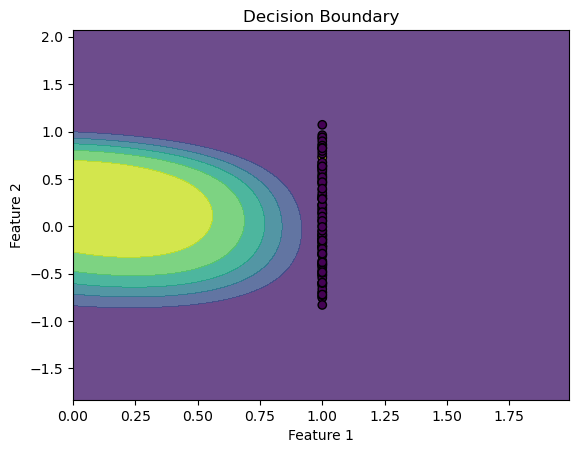

In [77]:
plot_decision_boundary(w, b, X_mapped, y_train)


In [78]:
#predict your training model
def predict(X, w, b):
    m,n=X.shape
    p=np.zeros(m)
  #write your code
    
    # Calculate predictions
    z = np.dot(X, w) + b
    probabilities = sigmoid(z)
    
    # Convert probabilities to binary predictions
    p[probabilities >= 0.5] = 1  # Set to 1 where probabilities >= 0.5
    
    return p

In [79]:
p = predict(X_mapped, w, b)

print('Accuracy of training model: %f'%(np.mean(p == y_train) * 100))

Accuracy of training model: 82.203390
